**LAB 8**

The aliasing is a phenomenon that appears when the image is undersampled without respecting the Shannon theorem. This phenomenon can be avoided by filtering the image properly before sampling. The purpose of this lab is to compare subsampling without a filter, with a Gaussian filter and then with an ideal filter.

Question 1-Load and display the image ’toit.jpg’ from moodle and convert it to  double and show it.


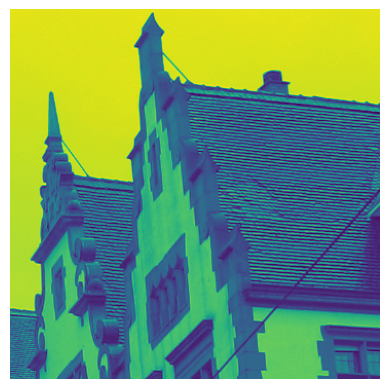

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('toit.jpg')
image_double = np.array(img).astype(np.float32)
plt.imshow(image_double)
plt.axis('off')
plt.show()


Question 2- Subsample the image by a factor of two, this can be done with the instruction I(1 : 2 : end, 1 : 2 : end). How does the aliasing phenomenon translate visually ?

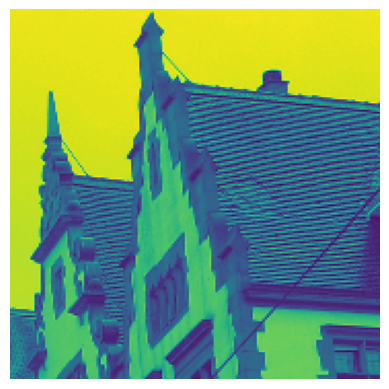

In [15]:
subsampled_image = image_double[1::2, 1::2]
plt.imshow(subsampled_image)
plt.axis('off')
plt.show()

Question 3-Display the modulus of the Fourier transform of the subsampled image and compare it to the modulus of the Fourier transform of the original image. How does the aliasing phenomenon translate visually on the Fourier transform? Look at the top left edge of the image and the edge at the bottom right of the image.

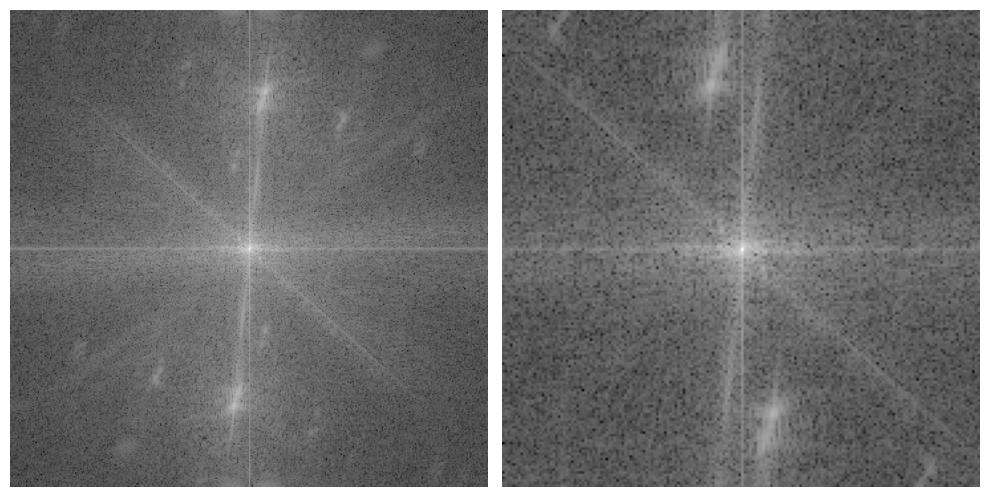

In [16]:
fft_original = np.fft.fftshift(np.fft.fft2(image_double))
fft_subsampled = np.fft.fftshift(np.fft.fft2(subsampled_image))
magnitude_spectrum_original = np.abs(fft_original)
magnitude_spectrum_subsampled = np.abs(fft_subsampled)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(magnitude_spectrum_original + 1), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.log(magnitude_spectrum_subsampled + 1), cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

Rather than being appropriately situated, high-frequency details emerge in locations where lower frequencies were expected. This distortion introduces additional patterns or artifacts, particularly near abrupt edges or transitions in the image.

Question 4- Apply a Gaussian filter to the image before sabsampling then show the modulus of the Fourier transform after filtering

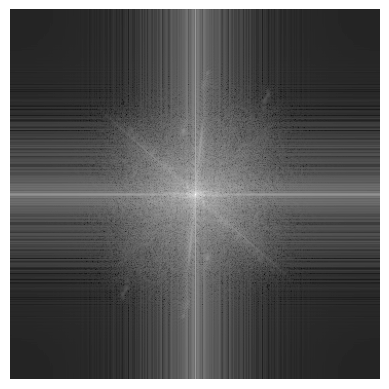

In [17]:
from scipy.ndimage import gaussian_filter
sigma = 1.5
filtered_image = gaussian_filter(image_double, sigma=sigma)
fft_filtered = np.fft.fftshift(np.fft.fft2(filtered_image))
magnitude_spectrum_filtered = np.abs(fft_filtered)
plt.imshow(np.log(magnitude_spectrum_filtered), cmap="gray")
plt.axis('off')
plt.show()